In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from datetime import timedelta
import os

%matplotlib inline
pd.set_option('display.max_columns',None) #设置显示所有的列，而不是显示。。。

In [2]:
# 将任务一中的分析数据读取出来
goOutNumberAndDistance = pd.read_csv('D:\lss\ccfData\HaiKouDeal\goOutNumberAndDistance.csv',index_col=None)
everyHourCount = pd.read_csv('D:\lss\ccfData\HaiKouDeal\everyHourCount.csv',index_col=None)
weather = pd.read_excel('D:\lss\ccfData\weather.xlsx',sheet_name='Sheet1',header=None)

# 对weather表的列名进行重命名
weather.columns=['date','week','maxTemp','minTemp','rain','holiday']

# 通过最低温度和最高温度来求平均温度
# 生成一个新的列，表示平均温度
weather.loc[:,'meanTemp'] = weather.apply(
    lambda x:(int(re.findall(r"\d+",x['maxTemp'])[0] )+int(re.findall(r"\d+",x['minTemp'])[0]))/2,axis=1)

In [3]:
# 在出行数据表中加入天气节假日等信息，方便后面数据的可视化
goOutNumberAndDistance.loc[:,'rain'] = weather['rain']
goOutNumberAndDistance.loc[:,'week'] = weather['week']
goOutNumberAndDistance.loc[:,'holiday'] = weather['holiday']

In [4]:
# 对于loc的使用要警惕，要解决有时候无法正常使用的问题，
goOutNumberAndDistance.loc[(goOutNumberAndDistance['week'] == '星期日')|(goOutNumberAndDistance['week'] == '星期六')|
                           (goOutNumberAndDistance['holiday'] == 1),'weekAndHoliday']=1

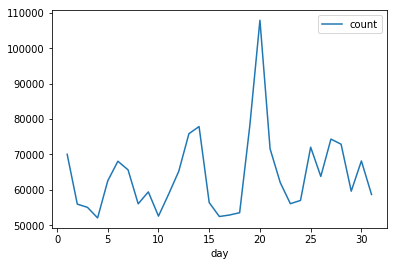

In [5]:
# 五月分的出行数量统计
goOutNumberAndDistance.loc[:30,:].plot(x='day',y='count')

In [22]:
# 获取fpath文件夹下的type类型文件的列表
def findFileInFiles(fpath, type):
    files = os.listdir(fpath)
    F = []
    for file in files:
        if type in file:
            F.append(file)
    return F

In [110]:
# 对一天中的早高峰进行分析
fileList = findFileInFiles('D:\lss\ccfData\HaiKouDeal\StartToDest','csv')
# 将读取的文件列表按照时间来进行排序
fileList.sort(key=lambda x: (int(re.findall(r"[0-9]+",x)[0]),int(re.findall(r"[0-9]+",x)[1])),reverse=False)

In [111]:
for file in fileList:
    print(file)

(5, 1).csv
(5, 2).csv
(5, 3).csv
(5, 4).csv
(5, 5).csv
(5, 6).csv
(5, 7).csv
(5, 8).csv
(5, 9).csv
(5, 10).csv
(5, 11).csv
(5, 12).csv
(5, 13).csv
(5, 14).csv
(5, 15).csv
(5, 16).csv
(5, 17).csv
(5, 18).csv
(5, 19).csv
(5, 20).csv
(5, 21).csv
(5, 22).csv
(5, 23).csv
(5, 24).csv
(5, 25).csv
(5, 26).csv
(5, 27).csv
(5, 28).csv
(5, 29).csv
(5, 30).csv
(5, 31).csv
(6, 1).csv
(6, 2).csv
(6, 3).csv
(6, 4).csv
(6, 5).csv
(6, 6).csv
(6, 7).csv
(6, 8).csv
(6, 9).csv
(6, 10).csv
(6, 11).csv
(6, 12).csv
(6, 13).csv
(6, 14).csv
(6, 15).csv
(6, 16).csv
(6, 17).csv
(6, 18).csv
(6, 19).csv
(6, 20).csv
(6, 21).csv
(6, 22).csv
(6, 23).csv
(6, 24).csv
(6, 25).csv
(6, 26).csv
(6, 27).csv
(6, 28).csv
(6, 29).csv
(6, 30).csv
(7, 1).csv
(7, 2).csv
(7, 3).csv
(7, 4).csv
(7, 5).csv
(7, 6).csv
(7, 7).csv
(7, 8).csv
(7, 9).csv
(7, 10).csv
(7, 11).csv
(7, 12).csv
(7, 13).csv
(7, 14).csv
(7, 15).csv
(7, 16).csv
(7, 17).csv
(7, 18).csv
(7, 19).csv
(7, 20).csv
(7, 21).csv
(7, 22).csv
(7, 23).csv
(7, 24).csv
(7, 25)

In [6]:
# 按照周末和法定节假日来得出一个工作日与休息日列1表示休息0为工作日
goOutNumberAndDistance['weekAndHoliday']=goOutNumberAndDistance['weekAndHoliday'].fillna(0)

In [7]:
goOutNumberAndDistance

,month,day,count,sum,mean,rain,week,holiday,weekAndHoliday
0,5,1,70029,526406019,7516.971812,多云,星期一,1.0,1.0
1,5,2,55948,405058052,7239.902266,多云,星期二,NaN,0.0
2,5,3,55045,395544647,7185.841530,多云,星期三,NaN,0.0
3,5,4,52058,373720969,7178.934439,雷阵雨,星期四,NaN,0.0
4,5,5,62533,439930114,7035.167256,雷阵雨~多云,星期五,NaN,0.0
5,5,6,68072,474019247,6963.498164,雷阵雨~多云,星期六,NaN,1.0
6,5,7,65642,473008952,7205.888791,雷阵雨~多云,星期日,NaN,1.0
7,5,8,56040,406887660,7260.664882,多云,星期一,NaN,0.0
8,5,9,59404,406102077,6836.274948,雷阵雨~多云,星期二,NaN,0.0
9,5,10,52567,381505152,7257.502844,雷阵雨~多云,星期三,NaN,0.0


将周末调班(5月27和9月30)设置为正常工作日：

In [8]:
goOutNumberAndDistance.loc[((goOutNumberAndDistance['month']==5) & (goOutNumberAndDistance['day'] == 27)),'weekAndHoliday']=0

In [9]:
goOutNumberAndDistance[(goOutNumberAndDistance['month']==5) & (goOutNumberAndDistance['day'] == 27)]

,month,day,count,sum,mean,rain,week,holiday,weekAndHoliday
26,5,27,74324,542863641,7304.015406,阵雨~多云,星期六,NaN,0.0


In [10]:
goOutNumberAndDistance.loc[((goOutNumberAndDistance['month']==9) & (goOutNumberAndDistance['day'] == 30)),'weekAndHoliday']=0

In [11]:
goOutNumberAndDistance[(goOutNumberAndDistance['month']==9) & (goOutNumberAndDistance['day'] == 30)]

,month,day,count,sum,mean,rain,week,holiday,weekAndHoliday
152,9,30,127599,945843997,7412.628602,雷阵雨~多云,星期六,NaN,0.0


In [12]:
# 对节假日和工作日出行数量进行分析0为工作日1为休息日
goOutNumberAndDistance.groupby('weekAndHoliday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weekAndHoliday,,,,,,,,
0.0,126.0,74080.587302,11904.165187,52058.0,65352.00,74142.5,79974.25,127599.0
1.0,58.0,83153.620690,13138.422737,59607.0,73736.25,80458.5,89288.00,119612.0


In [13]:
goOutNumberAndDistance['weekAndHoliday'].value_counts()

0.0    126
1.0     58
Name: weekAndHoliday, dtype: int64

<Figure size 432x288 with 0 Axes>

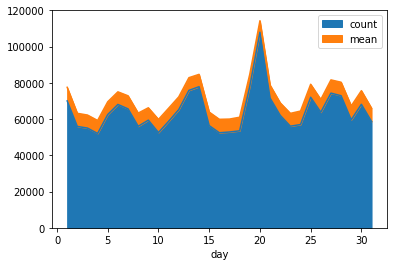

In [14]:
plt.figure()
goOutNumberAndDistance.loc[:30,:].plot.area(x='day',y=['count','mean'])

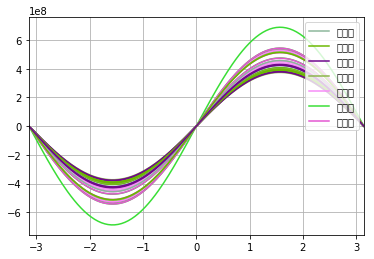

In [15]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(goOutNumberAndDistance.loc[:30,['count','sum','mean','week']], 'week')

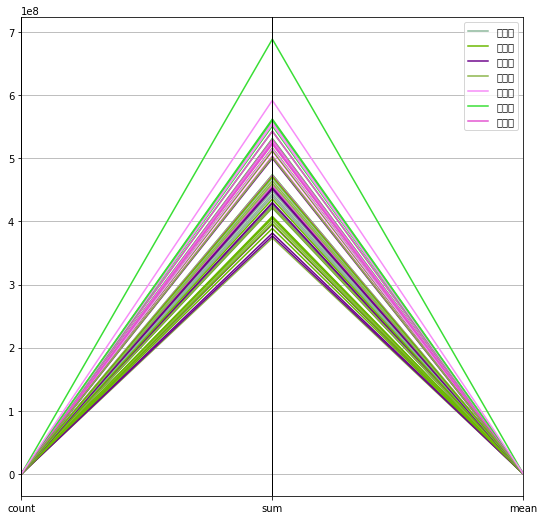

In [16]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize= [9, 8.8])
parallel_coordinates(goOutNumberAndDistance.loc[:60,['count','sum','mean','week']], 'week')

In [17]:
'星期一' in ('星期一','qing')

True

In [18]:
goOutNumberAndDistance.loc[:,['count','mean','week']]

,count,mean,week
0,70029,7516.971812,星期一
1,55948,7239.902266,星期二
2,55045,7185.841530,星期三
3,52058,7178.934439,星期四
4,62533,7035.167256,星期五
5,68072,6963.498164,星期六
6,65642,7205.888791,星期日
7,56040,7260.664882,星期一
8,59404,6836.274948,星期二
9,52567,7257.502844,星期三
